# Explore here

Prediciendo la diabetes con Boosting de Algoritmos

In [1]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
total_data=pd.read_csv("/workspaces/Boosting-algoritmos/data/dataset_procesado.csv")
total_data.head()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1


In [3]:

from sklearn.feature_selection import SelectKBest, f_classif

#   Cargar el dataset procesado
total_data = pd.read_csv("/workspaces/Boosting-algoritmos/data/dataset_procesado.csv")

#   Definir variables predictoras (X) y objetivo (y)
X = total_data.drop(columns=["Outcome"])
y = total_data["Outcome"]

#  Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# 5. Selección de características con SelectKBest (ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=7)
selector.fit(X_train, y_train)

#  Columnas seleccionadas
selected_columns = X_train.columns[selector.get_support()]
print(f"Columnas seleccionadas: {selected_columns.tolist()}")

#  6. Transformar conjuntos de entrenamiento y prueba
X_train_sel = pd.DataFrame(selector.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selector.transform(X_test), columns=selected_columns)

#  7. Guardar conjuntos seleccionados
X_train_sel.to_csv("/workspaces/Boosting-algoritmos/data/X_train_sel.csv", index=False)
X_test_sel.to_csv("/workspaces/Boosting-algoritmos/data/X_test_sel.csv", index=False)
y_train.to_csv("/workspaces/Boosting-algoritmos/data/y_train.csv", index=False)
y_test.to_csv("/workspaces/Boosting-algoritmos/data/y_test.csv", index=False)

print("Conjuntos seleccionados guardados con éxito.")

Columnas seleccionadas: ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Conjuntos seleccionados guardados con éxito.


Modelado

In [4]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state = 42)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [5]:
y_pred = model_xgb.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6883116883116883

In [7]:
from pickle import dump

dump(model_xgb, open("../models/xgbregressor_42.sav", "wb"))


Traemos los 2 modelos realizados con anterioridad para su comparacion

In [8]:

import pickle
import requests

url = "https://github.com/Gabymoctezuma/Random-Forest/raw/refs/heads/main/models/random_forest_classifier_default_42.sav"
filename = "random_forest_classifier_default_42.sav"

# Descargar el archivo
response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)

# Cargar el modelo
with open(filename, 'rb') as file:
    modelo_rf= pickle.load(file)

print(modelo_rf)


RandomForestClassifier(random_state=42)


In [9]:
import pickle
import requests

url2= "https://github.com/Gabymoctezuma/arbol-decision/raw/refs/heads/main/models/decision_tree_classifier_default_42.sav"
filename2="decision_tree_classifier_default_42.sav"

# Descargar el archivo
response = requests.get(url2)
with open(filename2, 'wb') as file:
    file.write(response.content)

# Cargar el modelo
with open(filename2, 'rb') as file:
    modelo_dt= pickle.load(file)

print(modelo_dt)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_leaf=4,
                       random_state=42)


**Analisis y comparacion de resultados de los 3 modelos**


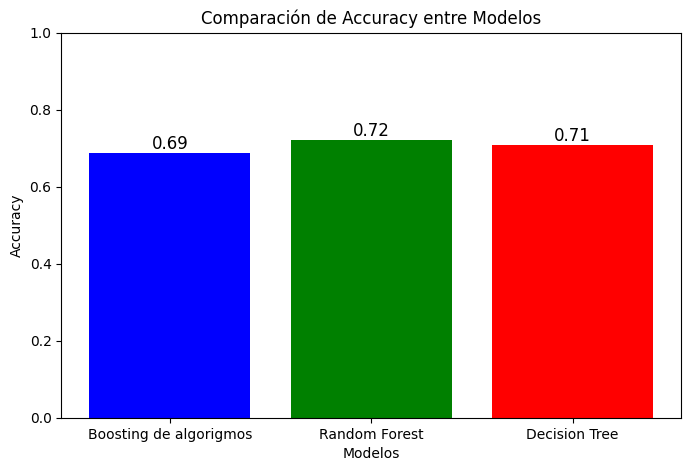

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc
import numpy as np

model_xgb.fit(X_train, y_train)  # Entrenar el modelo XGBoost
modelo_rf.fit(X_train, y_train)  # Entrenar el modelo
modelo_dt.fit(X_train, y_train)  # Entrenar el segundo modelo




# Nombres de los modelos
modelos = ['Boosting de algorigmos', 'Random Forest', 'Decision Tree']

# Simulación de predicciones reales y predichas
# (Reemplaza con tus datos reales)

y_pred_xgb = model_xgb.predict(X_test)
y_pred_rf = modelo_rf.predict(X_test)
y_pred_dt= modelo_dt.predict(X_test)

# Calcular accuracy para cada modelo
accuracy = [
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_dt)
]

# Crear la gráfica de accuracy
plt.figure(figsize=(8, 5))
plt.bar(modelos, accuracy, color=['blue', 'green', 'red'])

# Etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos')
plt.ylim(0, 1)  # Limitar entre 0 y 1 para representar porcentaje

# Mostrar los valores encima de las barras
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', fontsize=12)

# Mostrar la gráfica
plt.show()


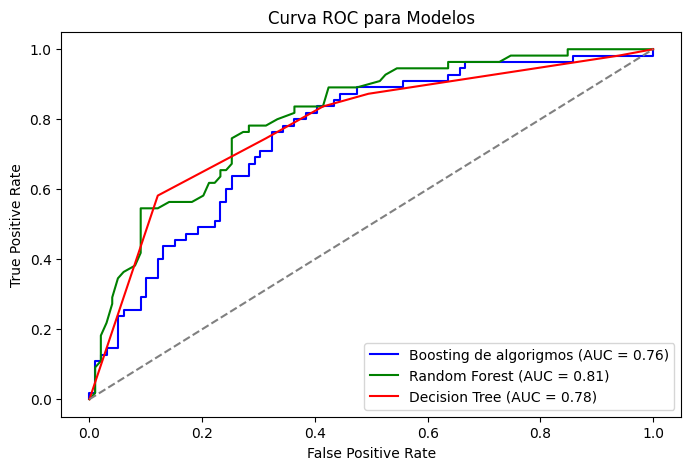

In [11]:
# Obtener probabilidades en lugar de etiquetas
y_pred_xgb_prob = model_xgb.predict_proba(X_test)[:, 1]
y_pred_rf_prob = modelo_rf.predict_proba(X_test)[:, 1]
y_pred_dt_prob = modelo_dt.predict_proba(X_test)[:, 1]

# Crear la gráfica ROC
plt.figure(figsize=(8, 5))
for y_pred_prob, modelo, color in zip([y_pred_xgb_prob, y_pred_rf_prob, y_pred_dt_prob], modelos, ['blue', 'green', 'red']):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Usar probabilidades
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{modelo} (AUC = {roc_auc:.2f})')

# Etiquetas y título
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Modelos')
plt.legend()

# Mostrar la gráfica ROC
plt.show()



Comparando los tres modelos, observamos que el modelo Random Forest presenta el mejor rendimiento en términos de accuracy y AUC en la curva ROC. Esto indica que el modelo logra clasificar correctamente una mayor cantidad de casos y mantiene un equilibrio adecuado entre la tasa de verdaderos positivos y la tasa de falsos positivos.
Sin embargo, es importante considerar factores como el costo computacional al momento de elegir el modelo más para el entrenamiento de los datos.

Se realizó un despligue en streamlit con el modelo de entrenamiento que tuvo mayor accuracy

https://boosting-algoritmos-4.onrender.com/